In [1]:
### Ejemeplo de T-Test de una muestra
### Ejemeplo de T-Test de dos muestra
### Ejemeplo de T-Test pareado
## ANova
## Independencia de datos cualitativos

In [2]:
## Librerias
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import math

In [3]:
np.random.seed(1234)

In [4]:
poblacion1=ss.poisson.rvs(loc=18,mu=35,size=450000)
poblacion2=ss.poisson.rvs(loc=18,mu=15,size=150000)

In [5]:
Espanya=np.concatenate((poblacion1,poblacion2))

In [8]:
granada1=ss.poisson.rvs(loc=18,mu=34,size=4500)
granada2=ss.poisson.rvs(loc=18,mu=14,size=1500)
Granada=np.concatenate((granada1,granada2))

In [11]:
print(Espanya.mean())
print(Granada.mean())

47.985978333333335
47.041333333333334


$$H_0 :   \mu_{G}=\mu_{ES}$$
$$H_1 : \mu_{G} \neq \mu_{ES}$$

In [15]:
estadistico,pvalor=ss.ttest_1samp(Granada,Espanya.mean())

c:\Users\Daniel Montes\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\Daniel Montes\Anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [16]:
if pvalor<=0.05:
    print("Rechazamos la ****")
else:
    print("Aceptamos la ***")

Aceptamos la ***


In [18]:
Madrid1=ss.poisson.rvs(loc=18,mu=37,size=120)
Madrid2=ss.poisson.rvs(loc=18,mu=13,size=80)
Madrid=np.concatenate((Madrid1,Madrid2))

In [19]:
Madrid.mean()

45.51

In [23]:
ss.ttest_ind(Granada,Madrid,equal_var=False)

Ttest_indResult(statistic=1.625292813950837, pvalue=0.1056206976163851)

$$ H_0 : \mu_{Gr} \leq \mu_{Ma}$$
$$ H_1 : \mu_{Gr} > \mu_{Ma}$$

In [39]:
ss.ttest_ind(Granada,Madrid,equal_var=False,alternative="greater")

Ttest_indResult(statistic=1.625292813950837, pvalue=0.05281034880819255)

In [24]:
## T-test Pareado
peso_precovid=ss.norm.rvs(scale=30,loc=100,size=1000)
peso_postcovid=peso_precovid+ss.norm.rvs(scale=10,loc=1.25,size=1000)

In [26]:
Pesos=pd.DataFrame({"peso_precovid":peso_precovid,
              "peso_postcovid":peso_postcovid,
              "Diferencia":peso_postcovid-peso_precovid})

In [27]:
Pesos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   peso_precovid   1000 non-null   float64
 1   peso_postcovid  1000 non-null   float64
 2   Diferencia      1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [29]:
Pesos.describe().T

,count,mean,std,min,25%,50%,75%,max
peso_precovid,1000.0,99.494926,29.372044,18.904032,79.790172,100.538261,119.403697,191.068108
peso_postcovid,1000.0,100.626846,31.254265,16.217784,78.993804,102.664495,121.151589,187.196743
Diferencia,1000.0,1.131921,10.418869,-33.078897,-5.981580,0.986090,7.693576,33.002352


$$ H_0: \mu_{AC} = \mu_{DC} $$
$$ H_1: \mu_{AC} \neq \mu_{DC} $$

In [36]:
ss.ttest_rel(peso_precovid,peso_postcovid,alternative="two-sided")

Ttest_relResult(statistic=-3.4355430326134817, pvalue=0.000615696939019648)

$$ H_0: \mu_{AC} \leq \mu_{DC} $$
$$ H_1: \mu_{AC} > \mu_{DC} $$

In [34]:
ss.ttest_rel(peso_precovid,peso_postcovid,alternative="greater")

Ttest_relResult(statistic=-3.4355430326134817, pvalue=0.9996921515304902)

$$ H_0: \mu_{AC} \geq \mu_{DC} $$
$$ H_1: \mu_{AC} < \mu_{DC} $$

In [37]:
ss.ttest_rel(peso_precovid,peso_postcovid,alternative="less")

Ttest_relResult(statistic=-3.4355430326134817, pvalue=0.000307848469509824)

In [31]:
ss.ttest_rel?

Signature: ss.ttest_rel(a, b, axis=0, nan_policy='propagate', alternative='two-sided')
Docstring:
Calculate the t-test on TWO RELATED samples of scores, a and b.

This is a two-sided test for the null hypothesis that 2 related or
repeated samples have identical average (expected) values.

Parameters
----------
a, b : array_like
    The arrays must have the same shape.
axis : int or None, optional
    Axis along which to compute test. If None, compute over the whole
    arrays, `a`, and `b`.
nan_policy : {'propagate', 'raise', 'omit'}, optional
    Defines how to handle when input contains nan.
    The following options are available (default is 'propagate'):

      * 'propagate': returns nan
      * 'raise': throws an error
      * 'omit': performs the calculations ignoring nan values
alternative : {'two-sided', 'less', 'greater'}, optional
    Defines the alternative hypothesis.
    The following options are available (default is 'two-sided'):

      * 'two-sided'
      * 'less': one-

### Anova

In [41]:
Peliculas=["IJ","Bat","Marvel","Senor_Anillos","Tenet"]
pelicula_vista=np.random.choice(a=Peliculas,
                                p=[0.1,0.2,0.2,0.15,0.35],
                                size=1000)
voto_Edad=ss.poisson.rvs(loc=9,mu=25,size=1000)

In [43]:
df=pd.DataFrame({"Pelicula":pelicula_vista,
              "Edad":voto_Edad})

In [44]:
df

,Pelicula,Edad
0,Marvel,25
1,Tenet,40
2,Marvel,34
3,IJ,28
4,Bat,43
...,...,...
995,IJ,38
996,IJ,31
997,Bat,35
998,Marvel,33


In [47]:
grupos=df.groupby('Pelicula').groups

In [50]:
Bat=voto_Edad[grupos["Bat"]]
IJ=voto_Edad[grupos["IJ"]]
Marvel=voto_Edad[grupos["Marvel"]]
Tenet=voto_Edad[grupos["Tenet"]]
Senor_Anillos=voto_Edad[grupos["Senor_Anillos"]]

In [51]:
ss.f_oneway(Senor_Anillos,Bat,Tenet,IJ,Marvel)

F_onewayResult(statistic=0.317001365881874, pvalue=0.8667017309886061)

$$ H_0: \mu_{0}=\mu_{1}=\ldots=\mu_{n}$$
$$ H_1: \mu_{i}\neq\mu_{j} \text{existe un i que la media es diferente para un j}$$

In [52]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [53]:
modelo=ols('Edad~Pelicula',data=df).fit()

In [54]:
modelo

In [55]:
sm.stats.anova_lm(modelo,typ=2)

,sum_sq,df,F,PR(>F)
Pelicula,31.407111,4.0,0.317001,0.866702
Residual,24645.063889,995.0,NaN,NaN


In [56]:
IJ_Edad=ss.poisson.rvs(loc=18,mu=35,size=1000)
voto_Edad=np.where(pelicula_vista=="IJ",IJ_Edad,voto_Edad)

In [57]:
df_1=pd.DataFrame({"Pelicula":pelicula_vista,
              "Edad":voto_Edad})

In [58]:
modelo=ols('Edad~Pelicula',data=df_1).fit()

In [59]:
sm.stats.anova_lm(modelo,typ=2)

,sum_sq,df,F,PR(>F)
Pelicula,32253.452111,4.0,322.929646,4.559791e-178
Residual,24844.563889,995.0,NaN,NaN


### Ejercicio
De manera automática encontrar el grupo diferente

### Solución
* Hacer las parejas
    *  Crearé una lista vacía para guardar las parejas
    * Lo haré mediante un for y tengo que evitar que las parejas se repitan o sean de la misma pelicula
* Cada pareja pasará por un ttest_ind
* Supondré que la varianza es desigual
* Si el p>0.05 pasaré
* Si es P<0.05 me quedaré con esa pareja



In [60]:
Peliculas=["IJ","Bat","Marvel","Senor_Anillos","Tenet"]
## Hacemos parejas
Parejas=[]
for x in range(4):
    for y in range(x+1,5):
        Parejas.append((Peliculas[x],Peliculas[y]))

In [61]:
Parejas

[('IJ', 'Bat'),
 ('IJ', 'Marvel'),
 ('IJ', 'Senor_Anillos'),
 ('IJ', 'Tenet'),
 ('Bat', 'Marvel'),
 ('Bat', 'Senor_Anillos'),
 ('Bat', 'Tenet'),
 ('Marvel', 'Senor_Anillos'),
 ('Marvel', 'Tenet'),
 ('Senor_Anillos', 'Tenet')]

In [63]:
Parejas[0][0]

'IJ'

In [66]:
ss.ttest_ind(voto_Edad[grupos[Parejas[0][0]]],
             voto_Edad[grupos[Parejas[0][1]]],
             equal_var=False)

Ttest_indResult(statistic=30.37951008120176, pvalue=8.563566722047627e-66)

In [69]:
for Peli1,Peli2 in Parejas:
    estadistico,pvalor=ss.ttest_ind(voto_Edad[grupos[Peli1]],
             voto_Edad[grupos[Peli2]],
             equal_var=False)
    if pvalor<0.05:
        print("\n",Peli1,"-vs-",Peli2)


 IJ -vs- Bat

 IJ -vs- Marvel

 IJ -vs- Senor_Anillos

 IJ -vs- Tenet


In [73]:
from  statsmodels.stats.multicomp import pairwise_tukeyhsd

In [82]:
tukey=pairwise_tukeyhsd(voto_Edad,pelicula_vista,alpha=0.05)

In [83]:
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Bat,IJ,20.1149,-0.0,18.3882,21.8416,True
Bat,Marvel,0.2976,0.9746,-1.0512,1.6464,False
Bat,Senor_Anillos,0.1853,0.997,-1.2848,1.6554,False
Bat,Tenet,0.4722,0.8194,-0.7282,1.6725,False
IJ,Marvel,-19.8173,-0.0,-21.5441,-18.0906,True
IJ,Senor_Anillos,-19.9296,-0.0,-21.7526,-18.1066,True
IJ,Tenet,-19.6427,-0.0,-21.2562,-18.0293,True
Marvel,Senor_Anillos,-0.1123,0.9996,-1.5823,1.3578,False
Marvel,Tenet,0.1746,0.9947,-1.0258,1.375,False
Senor_Anillos,Tenet,0.2869,0.977,-1.0483,1.6221,False


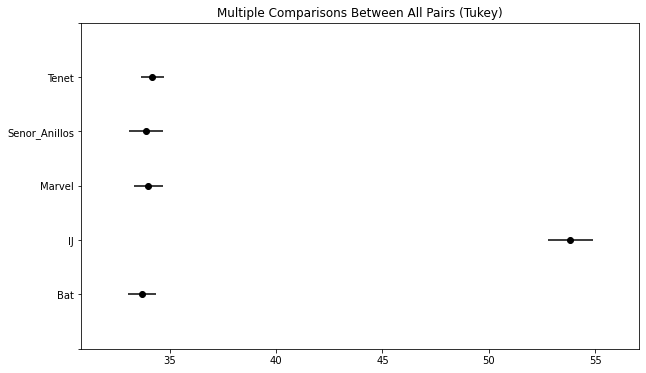

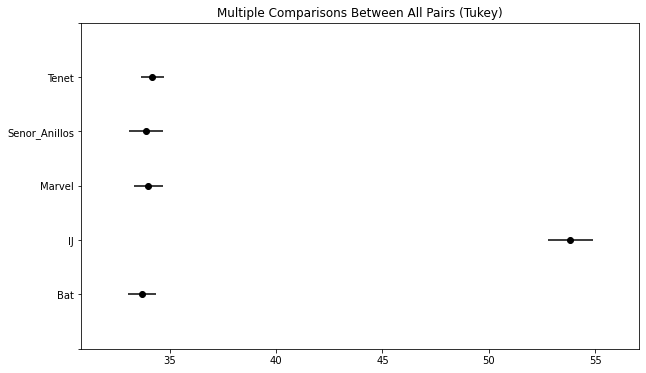

In [79]:
tukey.plot_simultaneous()